[2025-05-30 Fiddler](https://thefiddler.substack.com/p/can-you-weave-the-web)
====================

Fiddler
-------
First, given a first point, $a$, and a random second point, $b$, consider the
probability that some point, $c$, is on the line between $a$ and $b$.
The probability is proportional to the length of the line between $a$ and $c$
within the square, $L_{ac}$.

Let the corners of the square be at (0,0), (1,0), (1,1) and (0,1).

Let point $a$ be at $(x_a, y_a)$ and point $c$ be at $(x_c, y_c)$.

Consider point $c$ in the 1/8th of the square where $0 > x_c > y_c > 1/2$.
By symmetry, the distribution in the other 7/8ths should be the same with
appropriate combinations of rotation, reflection, and translation.

Point $c$ defines four regions of the square, and we can define $L_{ac}$ when
point $a$ is in each region, as illustrated in the following figure:

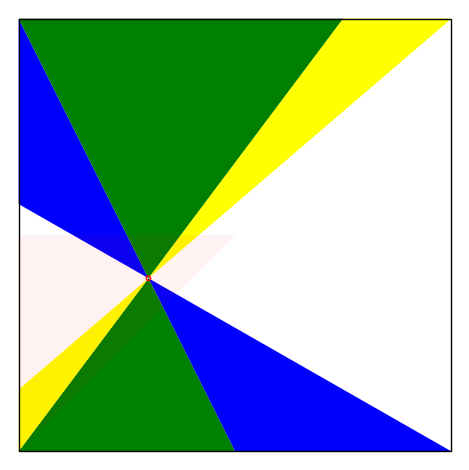

In [1]:
def fig(xp,yp,x0=0,y0=0):
    return (circle((x0+xp,y0+yp),0.005,color='red',axes=False)
            + polygon([(x0+0,y0+1),(x0+0,y0+yp/(1-xp)),(x0+xp,y0+yp)],color='blue')
            + polygon([(x0+1,y0+0),(x0+xp/(1-yp),y0+0),(x0+xp,y0+yp)],color='blue')
            + polygon([(x0+0,y0+1),(x0+xp/yp,y0+1),(x0+xp,y0+yp)],color='green')
            + polygon([(x0+0,y0+0),(x0+xp/(1-yp),y0+0),(x0+xp,y0+yp)],color='green')
            + polygon([(x0+1,y0+1),(x0+xp/yp,y0+1),(x0+xp,y0+yp)],color='yellow')
            + polygon([(x0+0,y0+0),(x0+0,y0+1-(1-yp)/(1-xp)),(x0+xp,y0+yp)],color='yellow')
            + polygon([(x0+0,y0+0),(x0+1,y0+0),(x0+1,y0+1),(x0+0,y0+1)],fill=False,color='black')
            + polygon([(x0+0,y0+0),(x0+1/2,y0+1/2),(x0+0,y0+1/2)],color='red',alpha=0.05)
           )

fig(0.3,0.4)

When point $c$ is at the center of the square, $1 \le L_{ac} \le \sqrt2$, and
the probability density gets the benefit of both diagonals.  The blue and yellow
areas vanish.

As point $c$ moves away from the center, the blue and yellow areas,
with smaller $L_{ac}$, grow.

At the middle of the left edge, the blue and yellow areas are maximized, so
I think the most likely point is the center of the square, and the least
likely points are the midpoints of each side.

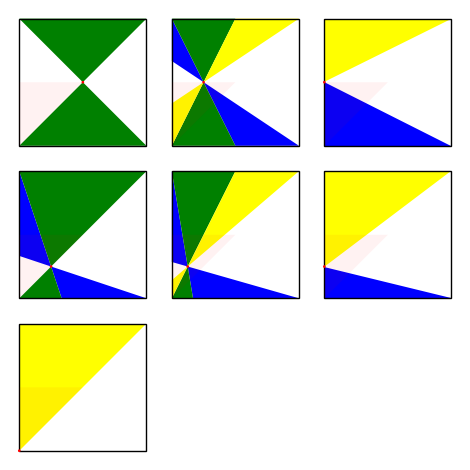

In [2]:
(fig(1/2,1/2)
 +fig(1/4,1/2,x0=1.2)
 +fig(0,1/2,x0=2.4)
 +fig(1/4,1/4,y0=-1.2)
 +fig(1/8,1/4,y0=-1.2,x0=1.2)
 +fig(0,1/4,y0=-1.2,x0=2.4)
 +fig(0,0.001,y0=-2.4)
)

Extra credit
------------
Define the line connecting the point $a$ and point $c$ and where it intersects the
edges of the square

In [3]:
x,y,xa,ya,xc,yc = var("x,y,x_a,y_a,x_c,y_c")
assume(0 < x, x < 1, 0 < y, y < 1, 0 < xa, xa < 1, 0 < ya, ya < 1, 0 < xc, xc < 1, 0 < yc, yc < 1)

lineac = (x-xa)/(xc-xa) == (y-ya)/(yc-ya)
y0 = solve(lineac.substitute(x==0),y)[0].rhs()
y1 = solve(lineac.substitute(x==1),y)[0].rhs()
x0 = solve(lineac.substitute(y==0),x)[0].rhs()
x1 = solve(lineac.substitute(y==1),x)[0].rhs()

And $L_{ac}$ in the four regions are

In [4]:
L_b = sqrt(x0^2+y0^2)
L_g = sqrt((x1-x0)^2+1)
L_y = sqrt((1-y0)^2+(1-x1)^2)
L_w = sqrt((y1-y0)^2+1)

The lines bounding the regions are

In [5]:
line00 = lineac.substitute(xa==0,ya==0)
line01 = lineac.substitute(xa==0,ya==1)
line10 = lineac.substitute(xa==1,ya==0)
line11 = lineac.substitute(xa==1,ya==1)

The probability density is proportional to $\int_0^1 dx_a\int_0^1 dy_a L_{ac}$.
Perhaps I've done something wrong.  It looks like the computer can't handle these integrals:

In [6]:
if False:
    P_b = (
        integral(
            integral(L_b, ya, solve(line10.substitute(x==xa),y)[0].rhs(), solve(line01.substitute(x==xa),y)[0].rhs()),
            xa, 0, xc) +
        integral(
            integral(L_b, xa, solve(line01.substitute(y==ya),x)[0].rhs(), solve(line10.substitute(y==ya),x)[0].rhs()),
            ya, 0, yc) +
        0)
    P_g = (
        integral(
            integral(L_g, xa, solve(line00.substitute(y==ya),x)[0].rhs(), solve(line01.substitute(y==ya),x)[0].rhs()),
            ya, 0, yc) +
        integral(
            integral(L_g, xa, solve(line01.substitute(y==ya),x)[0].rhs(), solve(line00.substitute(y==ya),x)[0].rhs()),
            ya, yc, 1) +
        0)
    P_y = (
        integral(
            integral(L_y, ya, solve(line00.substitute(x==xa),y)[0].rhs(), solve(line11.substitute(x==xa),y)[0].rhs()),
            xa, 0, xc) +
        integral(
            integral(L_y, xa, solve(line00.substitute(y==ya),x)[0].rhs(), solve(line11.substitute(y==ya),x)[0].rhs()),
            ya, yc, 1) +
        0)
    P_w = (
        integral(
            integral(L_w, ya, solve(line11.substitute(x==xa),y)[0].rhs(), solve(line10.substitute(x==xa),y)[0].rhs()),
            xa, 0, xc) +
        integral(
            integral(L_w, ya, solve(line10.substitute(x==xa),y)[0].rhs(), solve(line11.substitute(x==xa),y)[0].rhs()),
            xa, xc, 1) +
        0)
    P = P_b + P_g + P_y + P_w

Maybe it'll be better to use polar coordinates, with point $c$ as the origin.
Then, the probability density is proportionate to

$$ \int_0^{2\pi}d\theta\,\int_0^{R(\theta)} r\,dr\,\left(R(\theta) + R(\theta+\pi)\right) $$

where $r = R(\theta)$ is the edge of the square, and $L_{ac} = R(\theta) + R(\theta+\pi)$ is
independent of $r$, so the probability density is proportionate to

$$ \frac12\int_0^{2\pi}d\theta\,\left(R^3(\theta)+R^2(\theta)R(\theta+\pi)\right) $$


When point $c$ is the center of the square, $R(\theta+\pi) = R(\theta)$ and
$R(\theta) = 1/2\cos\theta$ when $0 \le \theta \le \pi/4$.

In [7]:
P_center = 8*1/2*integral(2/(2*cos(x))^3, x, 0, pi/4)
show(P_center)
numerical_approx(P_center)

1/2*sqrt(2) + 1/4*log(1/2*sqrt(2) + 1) - 1/4*log(-1/2*sqrt(2) + 1)

1.14779357469632

When point $c$ is at a corner of the square, $R(\theta+\pi) = 0$ and $R(\theta) = 1/\cos\theta$
when $0 \le \theta \le \pi/4$.

In [8]:
P_corner = 2*1/2*integral(1/cos(x)^3, x, 0, pi/4)
show(P_corner)
numerical_approx(P_corner)

1/2*sqrt(2) + 1/4*log(1/2*sqrt(2) + 1) - 1/4*log(-1/2*sqrt(2) + 1)

1.14779357469632

So it looks like the probability distribution is maximum at the corners
of the square as well as the center.

When point $c$ is at the middle of an edge, $R(\theta+\pi) = 0$ and
$R(\theta) = 1/\cos\theta$ when $0 \le \theta \le \arctan(1/2)$, and
$R(\theta) = 1/2\sin\theta$ when $\arctan(1/2) \le \theta \le \pi/2$.

In [9]:
P_mid = 2*1/2*(integral(1/cos(x)^3,x,0,arctan(1/2))
               +integral(1/(2*sin(x))^3,x,arctan(1/2),pi/2))
show(P_mid)
numerical_approx(P_mid)

1/4*sqrt(5) + 1/32*log(2/5*sqrt(5) + 1) + 1/4*log(1/5*sqrt(5) + 1) - 1/4*log(-1/5*sqrt(5) + 1) - 1/32*log(-2/5*sqrt(5) + 1)

0.889850124103425

Then, assuming $p_{max}$ is at the center and corners and $p_{min}$ is at the
middle of the edges, $p_{max}/p_{min}$ is

In [10]:
ratio = P_center/P_mid
show(ratio)
numerical_approx(ratio)

8*(2*sqrt(2) + log(1/2*sqrt(2) + 1) - log(-1/2*sqrt(2) + 1))/(8*sqrt(5) + log(2/5*sqrt(5) + 1) + 8*log(1/5*sqrt(5) + 1) - 8*log(-1/5*sqrt(5) + 1) - log(-2/5*sqrt(5) + 1))

1.28987291635520

Simulations
-----------

In [11]:
print(x0)
print(x1)
print(y0)
print(y1)

(x_c*y_a - x_a*y_c)/(y_a - y_c)
(x_c*y_a - x_a*y_c + x_a - x_c)/(y_a - y_c)
-(x_c*y_a - x_a*y_c)/(x_a - x_c)
-((x_c - 1)*y_a - (x_a - 1)*y_c)/(x_a - x_c)


In [12]:
def strand(xa,ya,xb,yb,xp,yp,alpha):
    x0 = (xb*ya-xa*yb)/(ya-yb)
    x1 = (xb*ya-xa*yb+xa-xb)/(ya-yb)
    y0 = (xa*yb-xb*ya)/(xa-xb)
    y1 = ((xa-1)*yb-(xb-1)*ya)/(xa-xb)
    if 0 <= x0 and x0 <= 1:
        if 0 <= x1 and x1 <= 1:
            return line([(xp+x0,yp+0),(xp+x1,yp+1)],alpha=alpha)
        elif 0 <= y0 and y0 <= 1:
            return line([(xp+x0,yp+0),(xp+0,yp+y0)],alpha=alpha)
        elif 0 <= y1 and y1 <= 1:
            return line([(xp+x0,yp+0),(xp+1,yp+y1)],alpha=alpha)
    elif 0 <= x1 and x1 <= 1:
        if 0 <= y0 and y0 <= 1:
            return line([(xp+x1,yp+1),(xp+0,yp+y0)],alpha=alpha)
        elif 0 <= y1 and y1 <= 1:
            return line([(xp+x1,yp+1),(xp+1,yp+y1)],alpha=alpha)
    elif 0 <= y0 and y0 <= 1:
        if 0 <= y1 and y1 <= 1:
            return line([(xp+0,yp+y0),(xp+1,yp+y1)],alpha=alpha)

def web(n,xp=0,yp=0,alpha=0.05):
    w = polygon([(xp+0,yp+0),(xp+1,yp+0),(xp+1,yp+1),(xp+0,yp+1)],fill=False,color='black',axes=False)
    for i in range(n):
        w += strand(random(),random(),random(),random(),xp,yp,alpha)
    return w

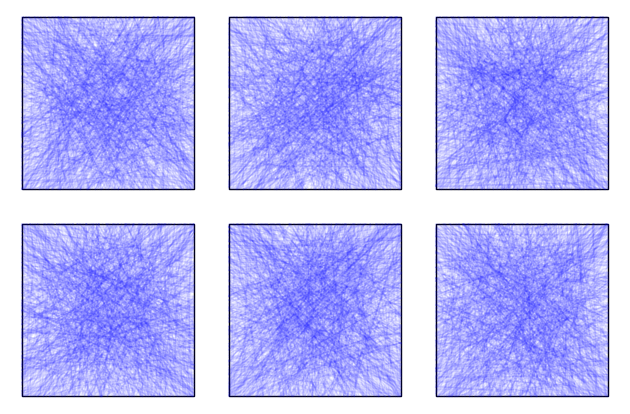

In [13]:
nstrands = 1000
(web(nstrands) + web(nstrands,xp=1.2) + web(nstrands,xp=2.4)
 + web(nstrands,yp=-1.2) + web(nstrands,yp=-1.2,xp=1.2) + web(nstrands,yp=-1.2,xp=2.4)
)

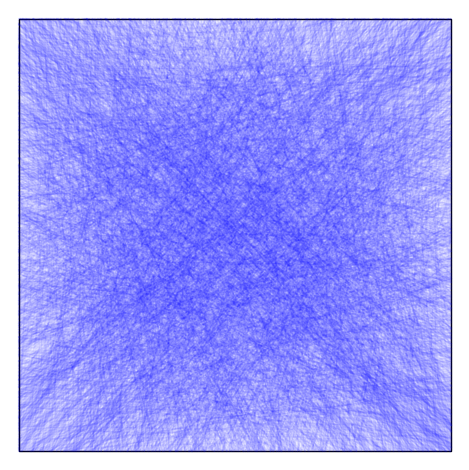

In [14]:
web(5000,alpha=0.03)

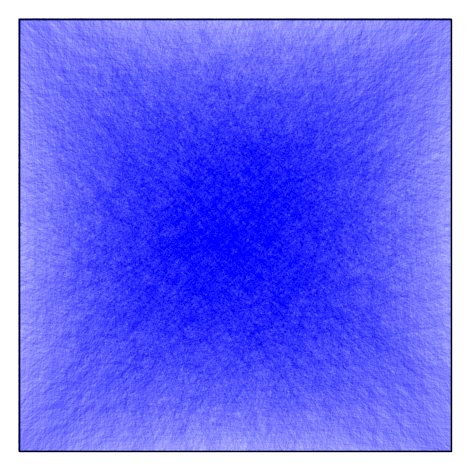

In [15]:
web(50000,alpha=0.005)

It seems plausible, but not definitive, that the center and the corners
are the most probable and the middles of the edges are the least
probable.

Based on looking at these simulations, it seems to me that the corners
are less probable than the center, but that's probably because the
center is the maximum of a very broad peak, while the peaks at the
corners are very narrow.

Another attempt
---------------
Taking a more numerical approach.

In [16]:
def P(xc,yc):
    if xc < 0 or xc > yc or yc > 1/2:
        return 0
    if yc == 0:
        return 1/2*sqrt(2) + 1/4*log(1/2*sqrt(2) + 1) - 1/4*log(-1/2*sqrt(2) + 1)
    # white area
    theta0 = arctan2(-yc,1-xc)
    theta1 = arctan2(1-yc,1-xc)
    r = abs((1-xc)/cos(x)) # right of point c
    rm = abs(xc/cos(x)) # left of point c
    p = 1/2*integral((r^2+rm^2)*(r+rm), x, theta0, theta1)
    # green area
    theta0 = arctan2(yc,xc)
    theta1 = arctan2(-(1-yc),xc)+pi
    r = abs((1-yc)/sin(x)) # above point c
    rm = abs(yc/sin(x)) # below point c
    p += 1/2*integral((r^2+rm^2)*(r+rm), x, theta0, theta1)
    # blue area
    theta0 = arctan2(-(1-yc),xc)
    theta1 = arctan2(-yc,1-xc)
    r = abs(yc/sin(x)) # below and right of point c
    rm = abs(xc/cos(x)) # above and left of point c
    p += 1/2*integral((r^2+rm^2)*(r+rm), x, theta0, theta1)
    # yellow area
    theta0 = arctan2(1-yc,1-xc)
    theta1 = arctan2(yc,xc)
    r = abs((1-yc)/sin(x)) # above and right of point c
    rm = abs(xc/cos(x)) # below and left of point c
    p += 1/2*integral((r^2+rm^2)*(r+rm), x, theta0, theta1)
    return numerical_approx(p)

Checking that it agrees my previous results.

In [17]:
P(1/2,1/2)-numerical_approx(P_center)

0.000000000000000

In [18]:
P(0,1/2)-numerical_approx(P_mid)

0.000000000000000

Checking that the center and the corners look like local maxima,
and that the middle of the edges look like local minima.

In [19]:
P(0,0.001)-numerical_approx(P_corner),P(0.001,0.001)-numerical_approx(P_corner)

(-0.000971027266093660, -0.000794280247969015)

In [20]:
P(1/2-0.001,1/2-0.0001)-numerical_approx(P_center),P(1/2-0.001,1/2)-numerical_approx(P_center)

(-1.96264706397997e-6, -1.94328908920127e-6)

In [21]:
(P(0+0.001,1/2)-numerical_approx(P_mid),
 P(0,1/2-0.001)-numerical_approx(P_mid),
 P(0+0.001,1/2-0.001)-numerical_approx(P_mid))

(0.00200079141924003, 1.08272757504135e-6, 0.00200187689929010)

Since this function is extremely slow, I'll tabulate a few values and
(linearly) interpolate for a faster function to use when making graphs.

In [22]:
p_table = {}
p_table[(0,0)] = numerical_approx(P_corner)
p_table[(1/5,0)] = numerical_approx(P_corner)
p_table[(2/5,0)] = numerical_approx(P_corner)
p_table[(3/5,0)] = numerical_approx(P_corner)
p_table[(4/5,0)] = numerical_approx(P_corner)
p_table[(1,0)] = numerical_approx(P_corner)
p_table[(0,1/10)]=1.05814640146632
p_table[(1/5,1/10)]=1.07749151630147
p_table[(2/5,1/10)]=1.08532401620440
p_table[(3/5,1/10)]=1.08851468095113
p_table[(4/5,1/10)]=1.08836638049349
p_table[(1,1/10)]=1.08540537540921
p_table[(0,1/5)]=0.985786703166797
p_table[(1/5,1/5)]=1.02355051960374
p_table[(2/5,1/5)]=1.04285839626152
p_table[(3/5,1/5)]=1.05498522385019
p_table[(4/5,1/5)]=1.06187142386744
p_table[(1,1/5)]=1.06409872264969
p_table[(0,3/10)]=0.932867935338276
p_table[(1/5,3/10)]=0.988822251300926
p_table[(2/5,3/10)]=1.02271063727682
p_table[(3/5,3/10)]=1.04862914541036
p_table[(4/5,3/10)]=1.06839829368686
p_table[(1,3/10)]=1.08180766616275
p_table[(0,2/5)]=0.900659424731909
p_table[(1/5,2/5)]=0.974221579011491
p_table[(2/5,2/5)]=1.02364930603099
p_table[(3/5,2/5)]=1.06492186766654
p_table[(4/5,2/5)]=1.09855245326456
p_table[(1,2/5)]=1.12174743577031
p_table[(0,1/2)]=0.889850124103425
p_table[(1/5,1/2)]=0.978950482235195
p_table[(2/5,1/2)]=1.04088339864216
p_table[(3/5,1/2)]=1.09278107950833
p_table[(4/5,1/2)]=1.13157813125499
p_table[(1,1/2)]=1.14779357469632
for i in [1..5]:
    yi = 1/2*i/5
    for j in [0..5]:
        xj = j/5
        if not (xj,yi) in p_table:
            print(f"p_table[({xj},{yi})]={P(xj*yi,yi)}")

In [23]:
def P_int(xc,yc):
    if xc < 0 or xc > 1 or yc < 0 or yc > 1:
        return 0
    if xc > 1/2:
        xc = 1 - xc
    if yc > 1/2:
        yc = 1 - yc
    if xc > yc:
        xc, yc = yc, xc
    if yc == 0:
        return p_table[(0,0)]
    xn = xc/yc
    iy0 = floor(yc*10)/10
    ix0 = floor(xn*5)/5
    if ix0 == 1:
        if iy0 == 1/2:
            return p_table[(ix0,iy0)]
        fy = (yc-iy0)*10
        return p_table[(ix0,iy0)]*(1-fy) + p_table[(ix0,iy0+1/10)]*fy
    fx = (xn-ix0)*5
    if iy0 == 1/2:
        return p_table[(ix0,iy0)]*(1-fx) + p_table[(ix0+1/5,iy0)]*fx
    fy = (yc-iy0)*10
    return ((p_table[(ix0,iy0)]*(1-fx) + p_table[(ix0+1/5,iy0)]*fx)*(1-fy)
            +(p_table[(ix0,iy0+1/10)]*(1-fx) + p_table[(ix0+1/5,iy0+1/10)]*fx)*fy)

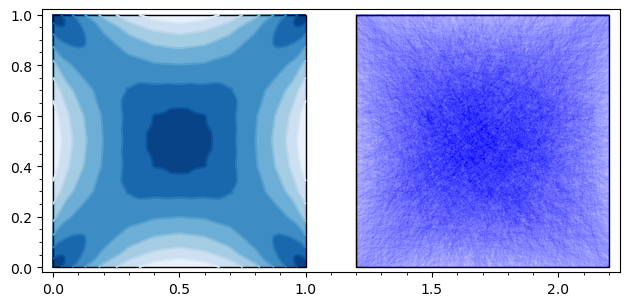

In [24]:
(contour_plot(P_int, (0,1), (0,1), cmap='Blues')
 + polygon([(0,0),(1,0),(1,1),(0,1)],color='black',fill=False)
 + web(25000,xp=1.2,alpha=0.005)
)

Comparing the contour plot with a simulation, I'm not seeing the peaks in the corners
of the simulation.  Other than that, they seem to match up pretty well, at least in
the general shape.  It's hard to say what the relative magnitudes of the maxima
and minima are for the simulation.

Another simulation
------------------
Doing [another simulation](20250530.go), it looks like the probability
distribution at the corners does match the probability distribution at
the center, but the probability distribution at middles of the edges are
smaller than what my calculation says, with the simulation giving
$p_{max}/p_{min} \approx 1.6$, compared to $p_{max}/p_{min} \approx 1.3$
in my calculation.

    $ go run 20250530.go
    3208/3271/3968 0.980740 1.616935
    3207/3191/3938 1.005014 1.628746

Not sure what the right answer is.